In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

files = os.listdir("C:/Users/suniantara/Desktop/bootcamp/data/uber/")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [2]:
files.remove('uber-raw-data-janjune-15.csv')
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [3]:
path = "C:/Users/suniantara/Desktop/bootcamp/data/uber/"

final = pd.DataFrame()

for file in files:
    df = pd.read_csv(path + file,encoding='utf-8')
    final = pd.concat([df,final])

In [4]:
df = final.copy()
df.head()

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

In [5]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [6]:
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['minute'] = df['Date/Time'].dt.minute
df['month'] = df['Date/Time'].dt.month
df['hour'] = df['Date/Time'].dt.hour

df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [7]:
df.head()

Date/Time      Lat      Lon    Base weekday  day  minute  month  \
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512  Monday    1       1      9   
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512  Monday    1       1      9   
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512  Monday    1       3      9   
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512  Monday    1       6      9   
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512  Monday    1      11      9   

   hour  
0     0  
1     0  
2     0  
3     0  
4     0

In [8]:
def count_rows(rows):
    return len(rows)

In [72]:
by_cross2 = df.groupby(['weekday','hour']).count().reset_index()
by_cross2
#stack

weekday  hour  Date/Time   Lat   Lon  Base   day  minute  month
0       Friday     0       1367  1367  1367  1367  1367    1367   1367
1       Friday     1        760   760   760   760   760     760    760
2       Friday     2        513   513   513   513   513     513    513
3       Friday     3        736   736   736   736   736     736    736
4       Friday     4        932   932   932   932   932     932    932
..         ...   ...        ...   ...   ...   ...   ...     ...    ...
163  Wednesday    19       7794  7794  7794  7794  7794    7794   7794
164  Wednesday    20       7783  7783  7783  7783  7783    7783   7783
165  Wednesday    21       6921  6921  6921  6921  6921    6921   6921
166  Wednesday    22       4845  4845  4845  4845  4845    4845   4845
167  Wednesday    23       2571  2571  2571  2571  2571    2571   2571

[168 rows x 9 columns]

In [65]:
pivot2 = by_cross2.stack().reset_index()
pivot2
#stack

weekday  hour    level_2     0
0        Friday     0  Date/Time  1367
1        Friday     0        Lat  1367
2        Friday     0        Lon  1367
3        Friday     0       Base  1367
4        Friday     0        day  1367
...         ...   ...        ...   ...
1171  Wednesday    23        Lon  2571
1172  Wednesday    23       Base  2571
1173  Wednesday    23        day  2571
1174  Wednesday    23     minute  2571
1175  Wednesday    23      month  2571

[1176 rows x 4 columns]

In [11]:
by_cross = df.groupby(['weekday','hour']).apply(count_rows)
by_cross
# unstack

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [12]:
pivot = by_cross.unstack()
pivot
# unstack

hour          0      1      2      3     4      5      6      7      8   \
weekday                                                                   
Friday     13716   8163   5350   6930  8806  13450  23412  32061  31509   
Monday      6436   3737   2938   6232  9640  15032  23746  31159  29265   
Saturday   27633  19189  12710   9542  6846   7084   8579  11014  14411   
Sunday     32877  23015  15436  10597  6374   6169   6596   8728  12128   
Thursday    9293   5290   3719   5637  8505  14169  27065  37038  35431   
Tuesday     6237   3509   2571   4494  7548  14241  26872  36599  33934   
Wednesday   7644   4324   3141   4855  7511  13794  26943  36495  33826   

hour          9   ...     14     15     16     17     18     19     20     21  \
weekday           ...                                                           
Friday     25230  ...  36206  43673  48169  51961  54762  49595  43542  48323   
Monday     22197  ...  28157  32744  38770  42023  37000  34159  32849  28925   
Saturday   17669  ...  31418  38769  43512  42844  45883  41098  38714  43826   
Sunday     16401  ...  28151  31112  33038  31521  28291  25948  25076  23967   
Thursday   27812  ...  36699  44442  50560  56704  55825  51907  51990  51953   
Tuesday    25023  ...  34846  41338  48667  55500  50186  44789  44661  39913   
Wednesday  25635  ...  35148  43388  50684  55637  52732  47017  47772  44553   

hour          22     23  
weekday                  
Friday     49409  41260  
Monday     20158  11811  
Saturday   47951  43174  
Sunday     19566  12166  
Thursday   44194  27764  
Tuesday    27712  14869  
Wednesday  32868  18146  

[7 rows x 24 columns]

<AxesSubplot:xlabel='hour', ylabel='weekday'>

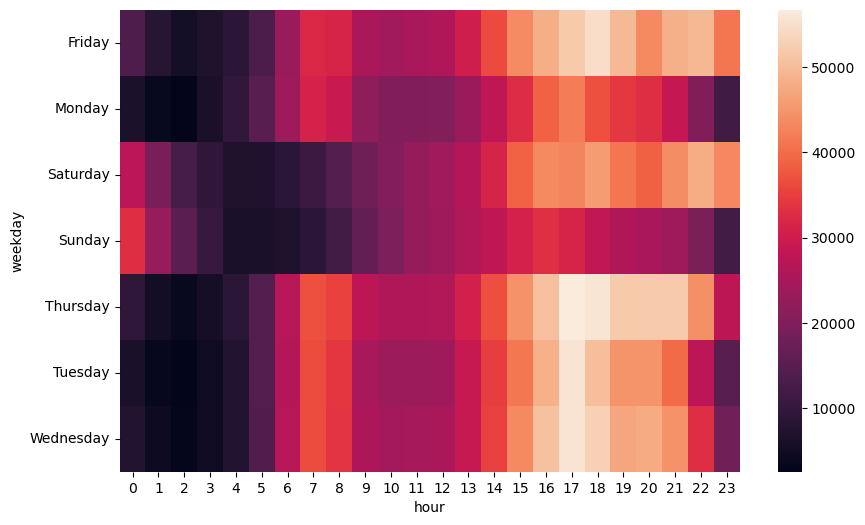

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=False)

In [14]:
def heatmap(col1,col2):
    by_cross = df.groupby([col1,col2]).apply(lambda x:len(x))
    pivot=by_cross.unstack()
    plt.figure(figsize=(10,6))
    return sns.heatmap(pivot,annot=False)

<AxesSubplot:xlabel='month', ylabel='day'>

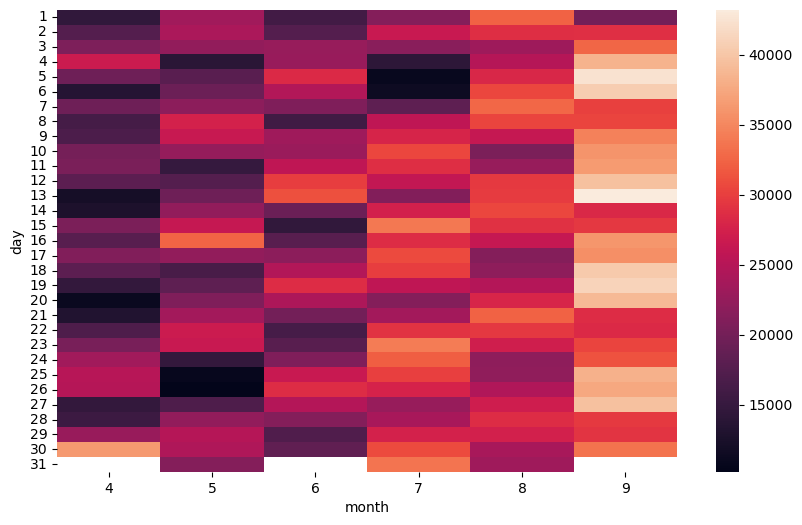

In [15]:
heatmap('day','month')

In [16]:
df = df[df['month'] == 4]
df

Date/Time      Lat      Lon    Base    weekday  day  minute  \
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    Tuesday    1      11   
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    Tuesday    1      17   
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    Tuesday    1      21   
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    Tuesday    1      28   
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    Tuesday    1      33   
...                    ...      ...      ...     ...        ...  ...     ...   
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764  Wednesday   30      22   
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764  Wednesday   30      26   
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764  Wednesday   30      31   
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764  Wednesday   30      32   
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764  Wednesday   30      48   

        month  hour  
0           4     0  
1           4     0  
2           4     0  
3           4     0  
4           4     0  
...       ...   ...  
564511      4    23  
564512      4    23  
564513      4    23  
564514      4    23  
564515      4    23  

[564516 rows x 9 columns]

<AxesSubplot:xlabel='month', ylabel='weekday'>

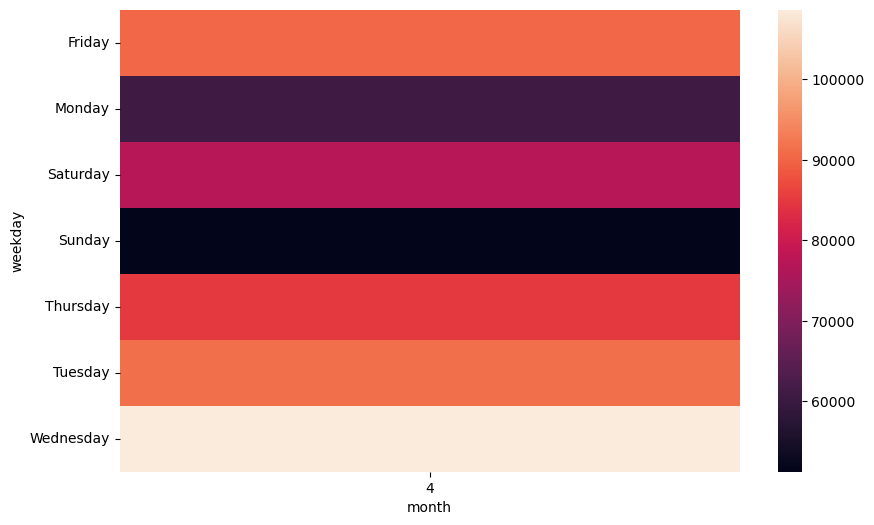

In [17]:
heatmap('weekday', 'month')

(40.6, 41.0)

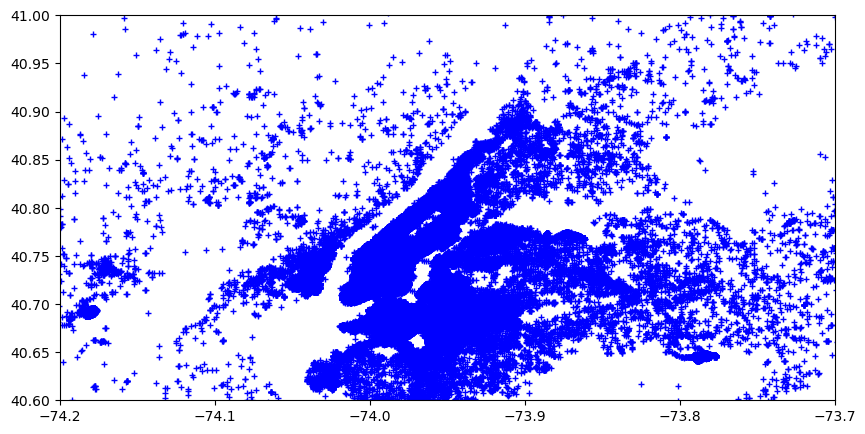

In [57]:
plt.figure(figsize=(10,5))

plt.plot(df['Lon'], df['Lat'], 'b+', ms=5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6,41)

In [19]:
df_out=df[df['weekday'] == 'Sunday']
df_out.head()

Date/Time      Lat      Lon    Base weekday  day  minute  \
6965 2014-04-06 00:00:00  40.6547 -74.3033  B02512  Sunday    6       0   
6966 2014-04-06 00:00:00  40.7356 -74.0006  B02512  Sunday    6       0   
6967 2014-04-06 00:00:00  40.7421 -74.0041  B02512  Sunday    6       0   
6968 2014-04-06 00:00:00  40.7401 -74.0053  B02512  Sunday    6       0   
6969 2014-04-06 00:01:00  40.7368 -73.9877  B02512  Sunday    6       1   

      month  hour  
6965      4     0  
6966      4     0  
6967      4     0  
6968      4     0  
6969      4     0

In [20]:
!pip install folium

In [21]:
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap
basemap = folium.Map()

In [63]:
HeatMap(df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index(),zoom=15,radius=10).add_to(basemap)
basemap

In [23]:
def plot_heatmap(df,day):
    df_out=df[df['weekday'] == day]
    df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()
    HeatMap(df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index(), zoom=20,radius=15).add_to(basemap)
    return basemap

In [24]:
plot_heatmap(df,'monday')

In [25]:
#assignment1

url = 'C:/Users/suniantara/Desktop/bootcamp/data/uber/uber-raw-data-janjune-15.csv'
data = pd.read_csv(url)
data

Dispatching_base_num          Pickup_date Affiliated_base_num  \
0                      B02617  2015-05-17 09:47:00              B02617   
1                      B02617  2015-05-17 09:47:00              B02617   
2                      B02617  2015-05-17 09:47:00              B02617   
3                      B02617  2015-05-17 09:47:00              B02774   
4                      B02617  2015-05-17 09:47:00              B02617   
...                       ...                  ...                 ...   
14270474               B02765  2015-05-08 15:43:00              B02765   
14270475               B02765  2015-05-08 15:43:00              B02765   
14270476               B02765  2015-05-08 15:43:00              B02765   
14270477               B02765  2015-05-08 15:44:00              B01899   
14270478               B02765  2015-05-08 15:44:00              B02682   

          locationID  
0                141  
1                 65  
2                100  
3                 80  
4                 90  
...              ...  
14270474         186  
14270475         263  
14270476          90  
14270477          45  
14270478         144  

[14270479 rows x 4 columns]

In [26]:
data['Pickup_date'].min()

'2015-01-01 00:00:05'

In [27]:
data['Pickup_date'].unique()

array(['2015-05-17 09:47:00', '2015-05-17 09:48:00',
       '2015-05-17 09:49:00', ..., '2015-02-20 00:34:53',
       '2015-02-20 13:26:20', '2015-02-20 14:08:07'], dtype=object)

In [28]:
data['Pickup_date'].max()

'2015-06-30 23:59:00'

In [29]:
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], format="%Y/%m/%d %H:%M:%S")

In [30]:
data['nama_hari'] = df['Date/Time'].dt.day_name()
data['bulan'] = df['Date/Time'].dt.month
data['tanggal'] = df['Date/Time'].dt.day
data['jam'] = df['Date/Time'].dt.hour
data['menit'] = df['Date/Time'].dt.minute
data['detik'] = df['Date/Time'].dt.second

data.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
nama_hari                       object
bulan                          float64
tanggal                        float64
jam                            float64
menit                          float64
detik                          float64
dtype: object

In [31]:
data = data.dropna()
data

Dispatching_base_num         Pickup_date Affiliated_base_num  \
0                    B02617 2015-05-17 09:47:00              B02617   
1                    B02617 2015-05-17 09:47:00              B02617   
2                    B02617 2015-05-17 09:47:00              B02617   
3                    B02617 2015-05-17 09:47:00              B02774   
4                    B02617 2015-05-17 09:47:00              B02617   
...                     ...                 ...                 ...   
564511               B02764 2015-05-21 11:23:00              B02764   
564512               B02764 2015-05-21 11:23:00              B00272   
564513               B02764 2015-05-21 11:23:00              B02764   
564514               B02764 2015-05-21 11:23:00              B02788   
564515               B02764 2015-05-21 11:23:00              B02764   

        locationID  nama_hari  bulan  tanggal   jam  menit  detik  
0              141    Tuesday    4.0      1.0   0.0   11.0    0.0  
1               65    Tuesday    4.0      1.0   0.0   17.0    0.0  
2              100    Tuesday    4.0      1.0   0.0   21.0    0.0  
3               80    Tuesday    4.0      1.0   0.0   28.0    0.0  
4               90    Tuesday    4.0      1.0   0.0   33.0    0.0  
...            ...        ...    ...      ...   ...    ...    ...  
564511         244  Wednesday    4.0     30.0  23.0   22.0    0.0  
564512         162  Wednesday    4.0     30.0  23.0   26.0    0.0  
564513         161  Wednesday    4.0     30.0  23.0   31.0    0.0  
564514          17  Wednesday    4.0     30.0  23.0   32.0    0.0  
564515         256  Wednesday    4.0     30.0  23.0   48.0    0.0  

[558309 rows x 10 columns]

In [32]:
data['bulan'] = data['bulan'].astype('int')
data['tanggal'] = data['tanggal'].astype('int')
data['jam'] = data['jam'].astype('int')
data['menit'] = data['menit'].astype('int')
data['detik'] = data['detik'].astype('int')

C:\Users\suniantara\AppData\Local\Temp\ipykernel_12468\1113324243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bulan'] = data['bulan'].astype('int')
C:\Users\suniantara\AppData\Local\Temp\ipykernel_12468\1113324243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tanggal'] = data['tanggal'].astype('int')
C:\Users\suniantara\AppData\Local\Temp\ipykernel_12468\1113324243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [33]:
data['Dispatching_base_num'].unique()

array(['B02617', 'B02598', 'B02682', 'B02764'], dtype=object)

In [34]:
traffic = data.groupby('Dispatching_base_num')['Dispatching_base_num'].count()
traffic

Dispatching_base_num
B02598     70963
B02617     50385
B02682    156807
B02764    280154
Name: Dispatching_base_num, dtype: int64

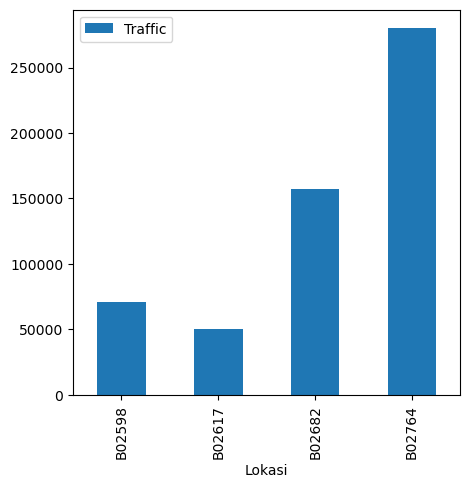

In [35]:
plt.figure(figsize=[5,5])
traffic.plot(kind='bar', label = 'Traffic')
plt.xlabel('Lokasi')
plt.grid(False)
plt.legend()

In [36]:
data['jam'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [73]:
jam = data.groupby('jam')['Dispatching_base_num'].count().reset_index()
jam

jam  Dispatching_base_num
0     0                 11751
1     1                  7695
2     2                  4894
3     3                  4992
4     4                  6035
5     5                  9371
6     6                 18295
7     7                 24650
8     8                 22592
9     9                 17704
10   10                 17660
11   11                 18534
12   12                 19220
13   13                 22312
14   14                 26894
15   15                 34965
16   16                 41551
17   17                 45004
18   18                 42491
19   19                 38510
20   20                 35868
21   21                 36594
22   22                 30295
23   23                 20432

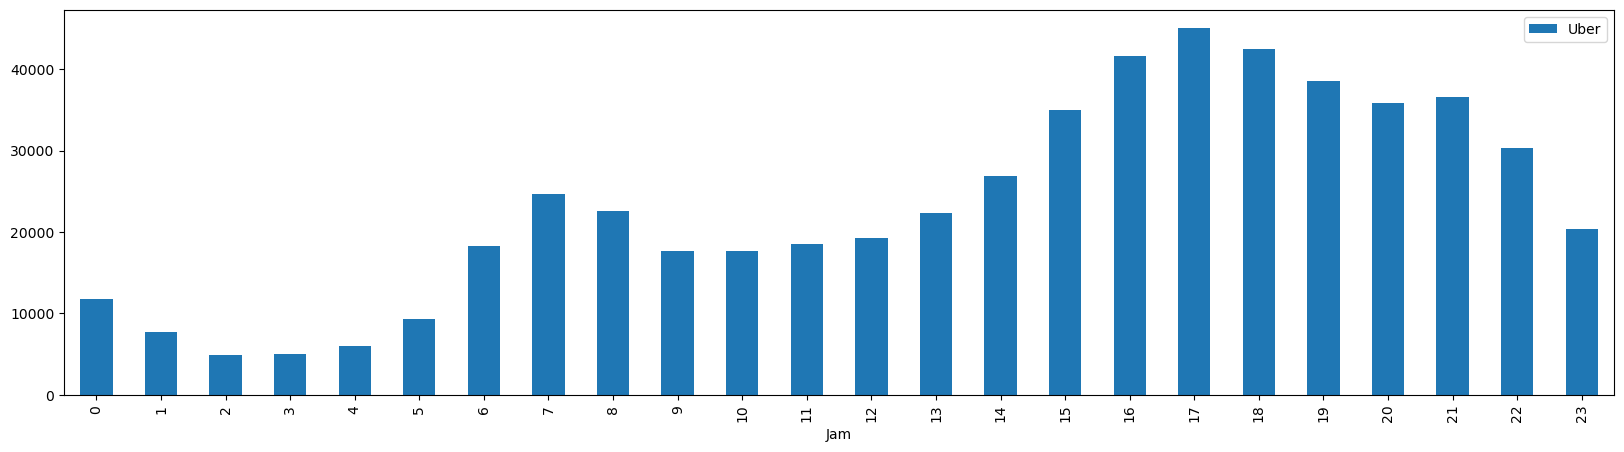

In [38]:
plt.figure(figsize=[20,5])
jam.plot(kind='bar', label = 'Uber')
plt.xlabel('Jam')
plt.grid(False)
plt.legend()

Text(0.5, 1.0, 'Traffic uber dalam seminggu')

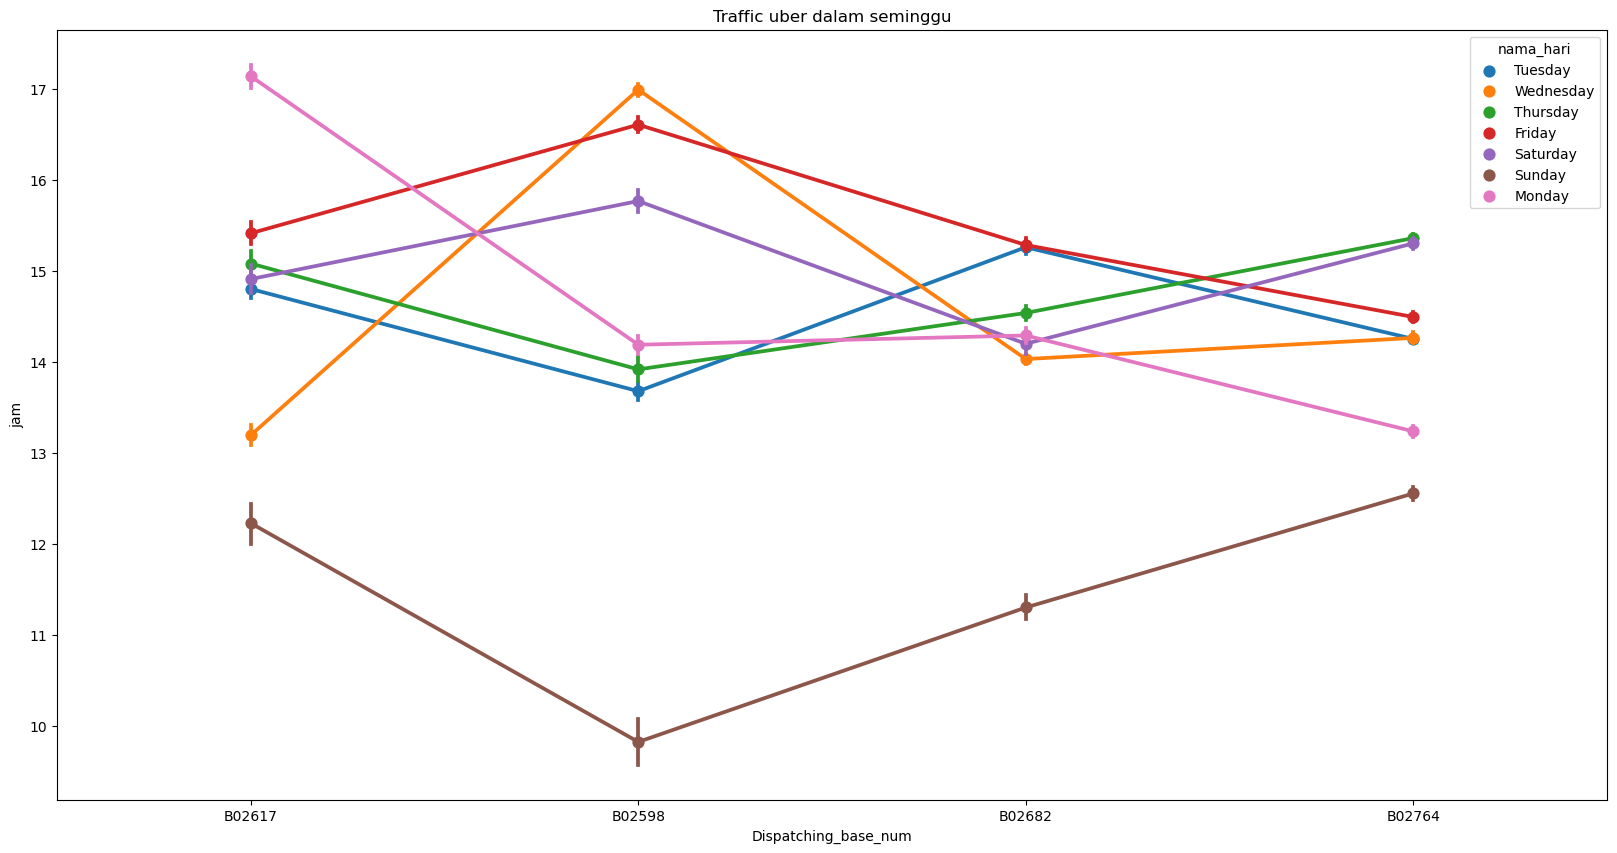

In [49]:
plt.figure(figsize=[20,10])
ax = sns.pointplot(x='Dispatching_base_num',y='jam',hue='nama_hari',data=data)
ax.set_title('Traffic uber dalam seminggu')

In [40]:
#assigntment2

url2 = 'C:/Users/suniantara/Desktop/bootcamp/data/Uber-Jan-Feb-FOIL.csv'
data2 = pd.read_csv(url2)
data2

dispatching_base_number       date  active_vehicles  trips
0                    B02512   1/1/2015              190   1132
1                    B02765   1/1/2015              225   1765
2                    B02764   1/1/2015             3427  29421
3                    B02682   1/1/2015              945   7679
4                    B02617   1/1/2015             1228   9537
..                      ...        ...              ...    ...
349                  B02764  2/28/2015             3952  39812
350                  B02617  2/28/2015             1372  14022
351                  B02682  2/28/2015             1386  14472
352                  B02512  2/28/2015              230   1803
353                  B02765  2/28/2015              747   7753

[354 rows x 4 columns]

In [41]:
data2['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

In [42]:
data2 = data2.dropna()

In [79]:
aktif = data2.groupby('dispatching_base_number')['active_vehicles'].sum()
aktif

dispatching_base_number
B02512     13125
B02598     58653
B02617     79758
B02682     71431
B02764    217290
B02765     22575
Name: active_vehicles, dtype: int64

Text(0.5, 1.0, 'active uber')

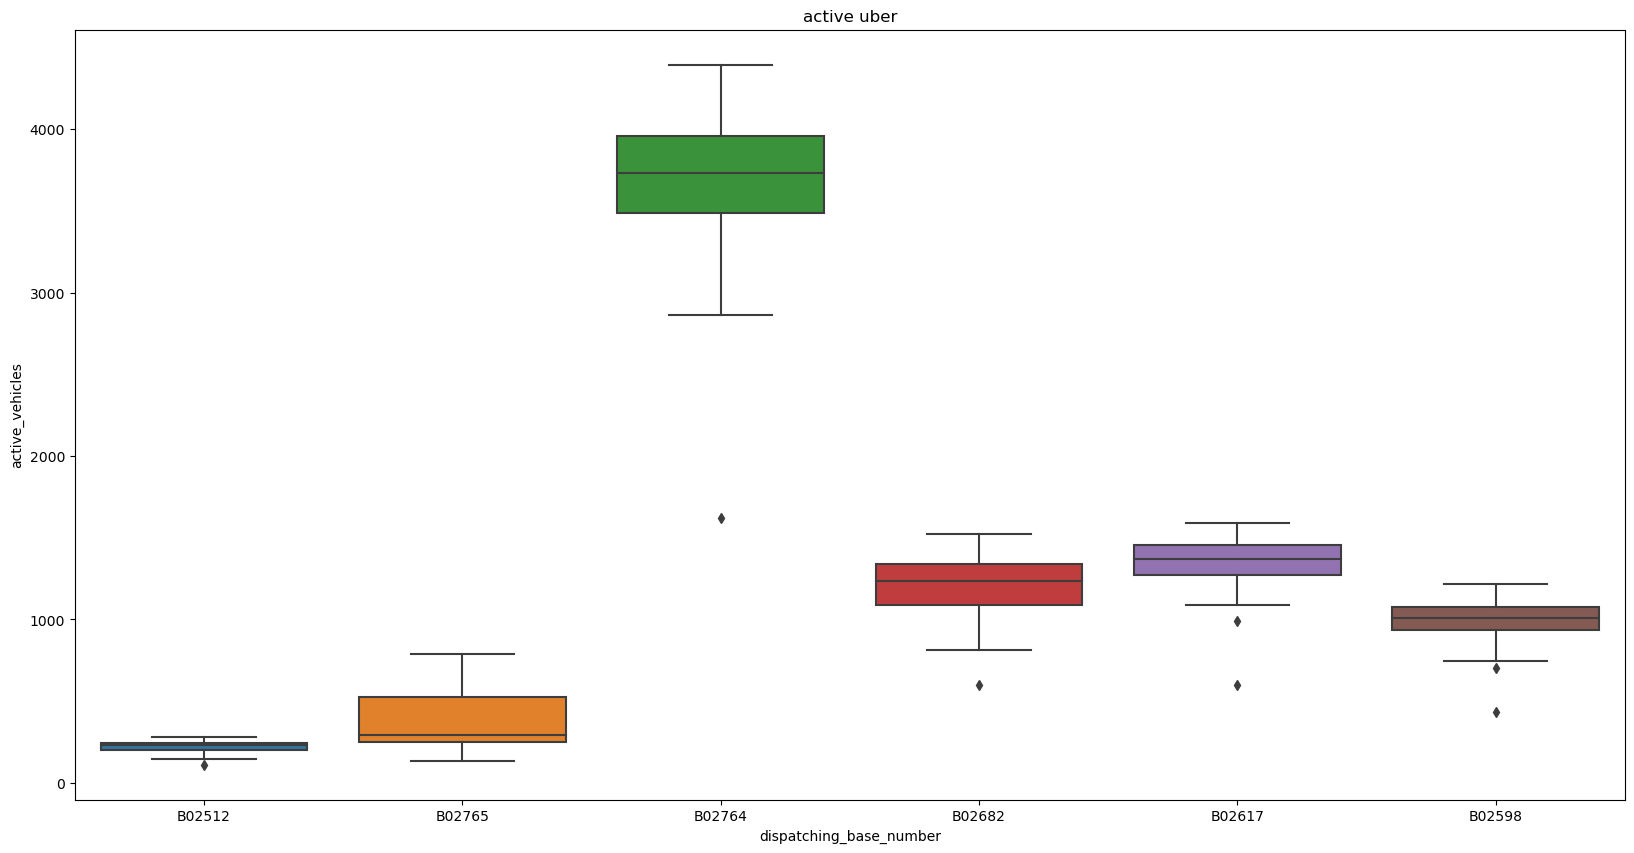

In [78]:
plt.figure(figsize=[20,10])
ax = sns.boxplot(x='dispatching_base_number',y='active_vehicles',data=data2)
ax.set_title('active uber')

In [45]:
perjalanan = data2.groupby('dispatching_base_number')['trips'].sum()
perjalanan

dispatching_base_number
B02512      93786
B02598     540791
B02617     725025
B02682     662509
B02764    1914449
B02765     193670
Name: trips, dtype: int64

In [46]:
rata = data2.groupby(['dispatching_base_number','date'])['trips'].mean().astype('int')
rata

dispatching_base_number  date     
B02512                   1/1/2015     1132
                         1/10/2015    1646
                         1/11/2015    1104
                         1/12/2015    1399
                         1/13/2015    1652
                                      ... 
B02765                   2/5/2015     3011
                         2/6/2015     3569
                         2/7/2015     3473
                         2/8/2015     2623
                         2/9/2015     2894
Name: trips, Length: 354, dtype: int32